# Identification of Car and Bike by CNN


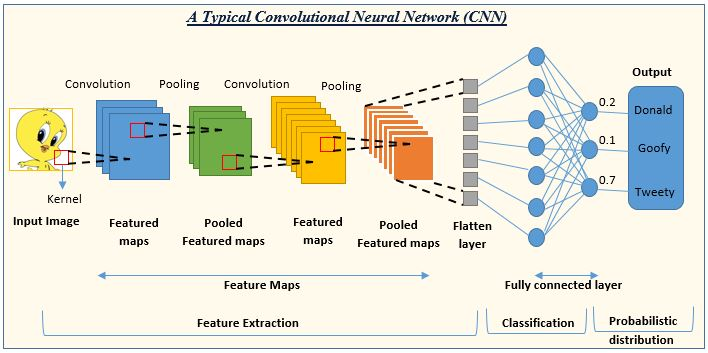


## Importing libraries

In [21]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

import seaborn as sns 
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

from keras.preprocessing import image

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [22]:
train_dir=r"D:\Data science\Python\DL & AI\CNN\Practise set\Car-Bike-Dataset\Train"

In [23]:
train_datagen = ImageDataGenerator(
    width_shift_range = 0.1,       
    height_shift_range = 0.1,       
    horizontal_flip = True,        
    rescale = 1./255,             
    validation_split = 0.2          
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,             
    validation_split = 0.2         
)

In [24]:

train_generator = train_datagen.flow_from_directory(
    directory = train_dir,         
    target_size = (128, 128),         
    batch_size = 64,              
    color_mode = "grayscale",     
    class_mode = "categorical",     
    subset = "training"            
)

validation_generator = validation_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (128, 128),         
    batch_size = 64,                
    color_mode = "grayscale",      
    class_mode = "categorical",     
    subset = "validation"           
)

Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


### image Displaying

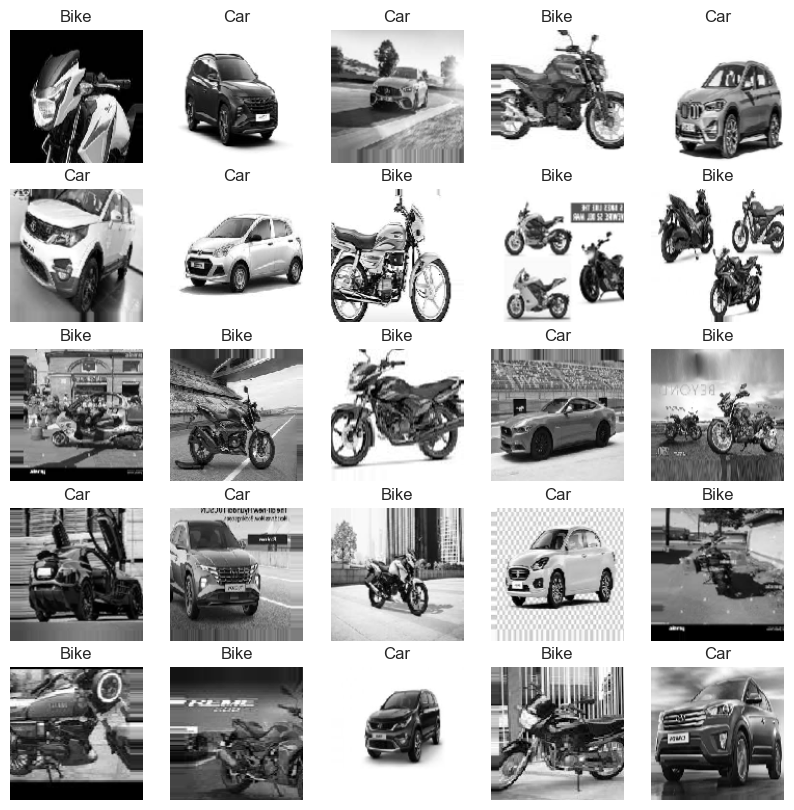

In [25]:
import matplotlib.pyplot as plt

batch = next(train_generator)


fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(batch[0][i], cmap='gray') 
    label_idx = batch[1][i].argmax() 
    label_map = {v:k for k,v in train_generator.class_indices.items()} 
    ax.set_title(label_map[label_idx]) 
    ax.axis('off') 
    
plt.show() 


## Model - CNN

In [26]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
import tensorflow as tf 



model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128,128,1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

'''Flattening'''

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 124, 124, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 124, 124, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 246016)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │      15,745,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,764,418 (60.14 MB)

 Trainable params: 15,764,226 (60.14 MB)

 Non-trainable params: 192 (768.00 B)

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath='model.weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

history = model.fit(
    train_generator,
    batch_size=64,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[checkpoint_callback]
)


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6819 - loss: 1.5746
Epoch 1: val_accuracy improved from -inf to 0.51250, saving model to model.weights.h5
50/50 ━━━━━━━━━━━━━━━━━━━━ 159s 3s/step - accuracy: 0.6833 - loss: 1.5608 - val_accuracy: 0.5125 - val_loss: 1.4996
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8287 - loss: 0.3677
Epoch 2: val_accuracy did not improve from 0.51250
50/50 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.8288 - loss: 0.3678 - val_accuracy: 0.5000 - val_loss: 7.2918
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8671 - loss: 0.3236
Epoch 3: val_accuracy did not improve from 0.51250
50/50 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.8671 - loss: 0.3238 - val_accuracy: 0.5000 - val_loss: 11.9338
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8718 - loss: 0.3377
Epoch 4: val_accuracy did not improve from 0.51250
50/50 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.8720 - loss: 0.3368 - val_

## Validation

In [28]:
validation_loss, validation_acc = model.evaluate(validation_generator)
print('Validation loss:', validation_loss, '\t Validation accuracy:', validation_acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 418ms/step - accuracy: 0.8287 - loss: 0.6846
Validation loss: 0.7017608284950256 	 Validation accuracy: 0.8274999856948853


## loss and accuacy Plots

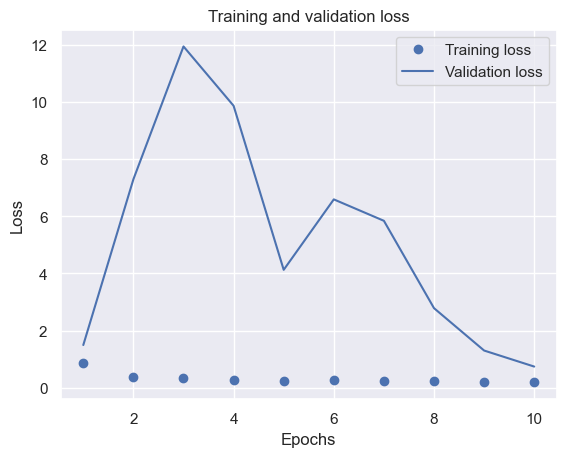

In [38]:

train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

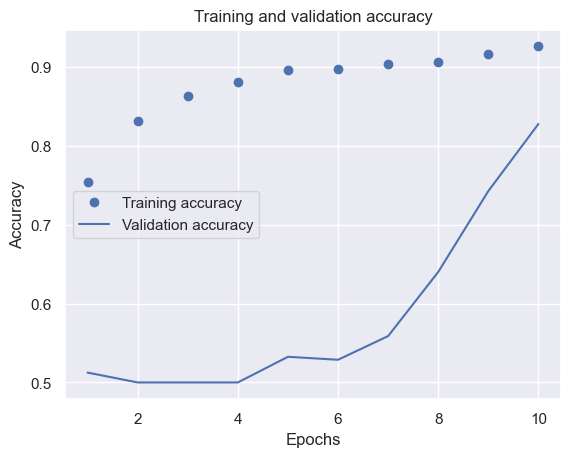

In [30]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Confusion Matrix

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 432ms/step


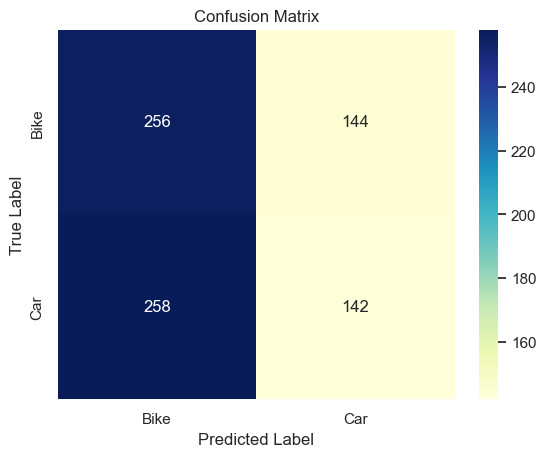

In [31]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix

validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Predicting Images

In [34]:

def pred_img(x):
    img = image.load_img(x, target_size=(128, 128), color_mode='grayscale')  
    img_array = image.img_to_array(img)  
    img_array = np.expand_dims(img_array, axis=0) 
    img_array /= 255. 

    prediction = model.predict(img_array)  

    label_map = {v:k for k,v in train_generator.class_indices.items()} 
    predicted_label = label_map[np.argmax(prediction)]  
    print("The object in the image is classified as :", predicted_label)  
    plt.imshow(plt.imread(x))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
The object in the image is classified as : Car


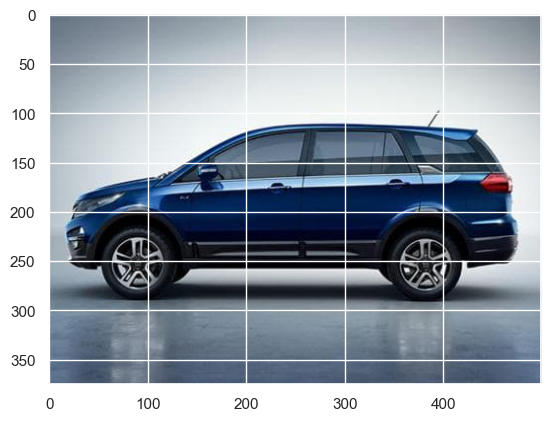

In [35]:
pred_img(r"D:\Data science\Python\DL & AI\CNN\Practise set\Car-Bike-Dataset\Train\Car\Car (21).jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
The object in the image is classified as : Bike


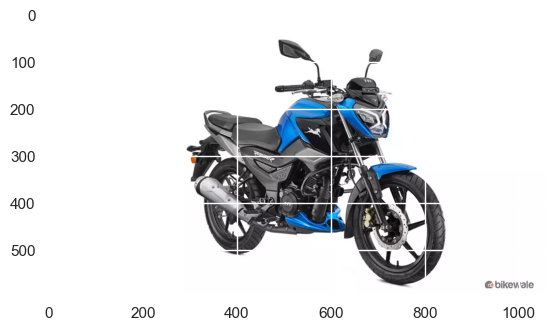

In [36]:
pred_img(r"C:\Users\chand\Downloads\bike1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
The object in the image is classified as : Car


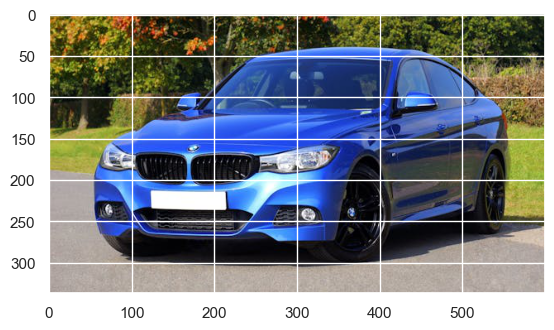

In [37]:
pred_img(r"C:\Users\chand\Downloads\pexels-photo-170811.jpeg")